In [1]:
#Author: Wei Xiong
#Date: Feb 24, 2021
#Paper: Increased ranking change in wheat breeding under climate change
#Plots: Figure S1 - Heading date prediction
#       Figure S2 - FW to identify crossover - method illustration 
#       Figure S3 - Mega environment, not included in the script
#       Figure S4 - Yield variances caused by G and E
#       Figure S5 - Changes in mean of the six climatic variables 
#       Figure S6 - Changes in variation of the six climatic variables
#       Figure S7 - Possibility distribution of crossover 
#       Figure S8 - Reponse of simulated yield and crossover to L1
#       Figure S9 - Result sensitivity to L1 coefficient
#       Figure S10 - Reported yield changing trends

In [1]:
#!/usr/bin/python
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
%matplotlib inline

In [2]:
from scipy.stats import pearsonr

In [3]:
#Windows
base_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\"
in_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\6_Figures\\"
data_out="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\2_Results\\NP_data\\"
#out_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1_Cross_Over\\2_Results\\"#P1_Figure_1\\"
#weat_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\Weather\\Output\\"
#Mac:
#base_dir="/Users/weixiong/Dropbox (RSG)/Works/CurrentProcessing/Wheat_Phenotypic/1_Cross_Over/"
#in_dir=base_dir+"1_Data/"
#os.chdir(base_dir+"6_Figures/NCC_R1_Suppl-FigS")#P1_Figure_1/"
#weat_dir="/Users/weixiong/Dropbox (RSG)/Works/CurrentProcessing/Wheat_Phenotypic/Weather/Output/"
nursery=['ESWYT','IDYN','HTWYT','SAWYT']
per=['sea','veg','rep','gfi']
env_cli=['tmax','tmin','pre','rad','vpd','hud']

# Fig S1 heading date prediction - calibration and validation

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(160,190,'R$\\mathregular{^{2}}$ = 0.804')

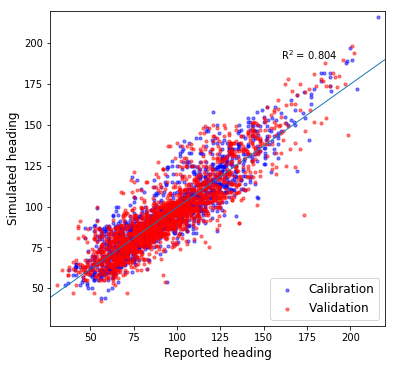

In [90]:
#Plot S1
out=pd.read_csv(base_dir+"6_Figures/NCC_R1_Fig0-Dataprocessing/Model_Phenology_sol.csv")[['nursery','year','E!','head','anth','matu']]
df=pd.read_csv(base_dir+"6_Figures/NCC_R1_Fig0-Dataprocessing/IWIN_CalibratedRows_HeadAnth.csv")[['nursery','year','E!','phen']]
df=df[df['phen']=='head']
df['year']=df['year'].astype('float')
out=out.merge(df,how='left')
df=pd.read_csv(base_dir+"6_Figures/NCC_R1_Fig0-Dataprocessing/IWIN_SimulationOutput_OnlyHeading_1.csv")[['nursery','year','E!','sim_head','sim_anth','sim_matu']]
df['year']=df['year'].astype('float')
df=df[df['sim_head']>0]
out=out.merge(df,how='left')


fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(6,5.8))
df=out[out['phen']=='head'][['head','sim_head']].dropna()
axs.scatter(df['head'],df['sim_head'],s=10,marker='o',c='b',alpha=0.5,label='Calibration')
df=out[out['phen']!='head'][['head','sim_head']].dropna()
axs.scatter(df['head'],df['sim_head'],s=10,marker='o',c='r',alpha=0.5,label='Validation')
df=out[['head','sim_head']].dropna()
sns.regplot(df['head'],df['sim_head'],ax=axs,ci=0,scatter=False,line_kws={"c":"black","lw":1})
axs.set_xlim([27,220])
axs.set_ylim([27,220])
axs.set_xlabel("Reported heading",fontsize=12)
axs.set_ylabel("Simulated heading",fontsize=12)
axs.legend(loc='lower right',fontsize=12)
corr,_=pearsonr(df['head'],df['sim_head'])
r2=round(corr**2,3)
axs.text(160,190,'R$\mathregular{^{2}}$ = %0.3f' % r2)
#fig.savefig(data_out+"S1_Heading_prediction.png",dpi=300,bbox_inches = 'tight')

# Fig S2 - Illustration of how to count crossover

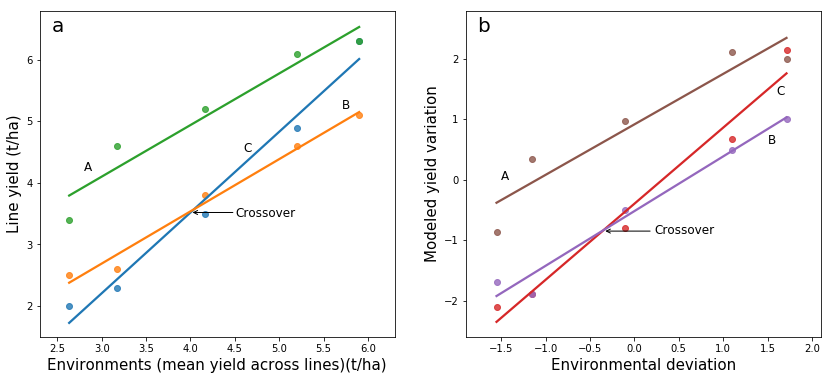

In [152]:
data={'A':[2.0,2.3,3.5,4.9,6.3],
      'B':[2.5,2.6,3.8,4.6,5.1],
      'C':[3.4,4.6,5.2,6.1,6.3]}
df=pd.DataFrame(data)
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
for i in range(3):
    sns.regplot(df.mean(axis=1),df.iloc[:,i],ax=axs[0],ci=0,truncate=True)
axs[0].set_xlim([2.3,6.3])
axs[0].set_ylim([1.5,6.8])
axs[0].set_xlabel('Environments (mean yield across lines)(t/ha)',fontsize=15)
axs[0].set_ylabel('Line yield (t/ha)',fontsize=15)
axs[0].text(2.8,4.2,'A',fontsize=12)
axs[0].text(5.7,5.2,'B',fontsize=12)
axs[0].text(4.6,4.5,'C',fontsize=12)
axs[0].text(4.5, 3.45,'Crossover',fontsize=12)
axs[0].annotate("", xy=(4.0,3.52), xytext=(4.5, 3.52),arrowprops=dict(arrowstyle="->"))

data={'A':[2.1,2.3,3.4,4.87,6.34],
      'B':[2.5,2.3,3.7,4.7,5.2],
      'C':[3.34,4.54,5.18,6.32,6.2]}
df=pd.DataFrame(data)
Ej=df.mean(axis=1)-df.mean(axis=1).mean()
for i in range(3):
    sns.regplot(Ej,df.iloc[:,i]-df.values.mean(),ax=axs[1],ci=0,truncate=True)
axs[1].set_xlim([-1.9,2.1])
axs[1].set_ylim([-2.6,2.8])
axs[1].set_xlabel('Environmental deviation',fontsize=15)
axs[1].set_ylabel('Modeled yield variation',fontsize=15)
axs[1].text(-1.5,0,'A',fontsize=12)
axs[1].text(1.5,0.6,'B',fontsize=12)
axs[1].text(1.6,1.4,'C',fontsize=12)
axs[1].annotate("", xy=(-0.35,-0.85), xytext=(0.2, -0.85),arrowprops=dict(arrowstyle="->"))
axs[1].text(0.22, -0.90,'Crossover',fontsize=12)
#fig.savefig("S13_FWcrossover.png",dpi=300,bbox_inches = 'tight')

for row in range(2): 
    posx=axs[row].get_xlim()[0]+(axs[row].get_xlim()[1]-axs[row].get_xlim()[0])/30
    posy=axs[row].get_ylim()[1]-(axs[row].get_ylim()[1]-axs[row].get_ylim()[0])/15
    axs[row].text(posx,posy,chr(97+row),fontsize=20)
fig.savefig(base_dir+"6_Figures/NP_Plots/FigS2_crosscount.png",dpi=300,bbox_inches = 'tight')

# Fig 4 - yield variance caused by G and E

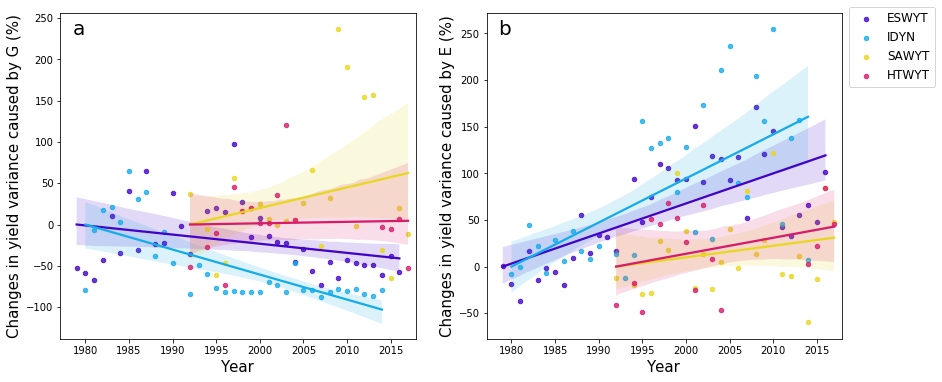

In [11]:
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea', '#e8d71e','#d71b6b']
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,6))

df=pd.read_csv(data_out+"real_GEI.csv")
for n in range(4): #Add IDYN is because the last line always too long
    #MS of G
    df1=df[df['nursery']==nursery[n]]
    x=df1.year
    X_opt = np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=df1.G/df1.Gn
    y=np.asarray(y)
    OLS = sm.OLS(endog = y, exog = X_opt).fit()
    baseyld=OLS.params[0]+OLS.params[1]*min(x)
    y=100*(df1.G/df1.Gn-baseyld)/baseyld
    sns.regplot(x,y,color=colors[n],marker='o',ax=axes[0],robust=False,truncate=True,scatter_kws={"alpha":0.8,"s":20})
    #MS of E
    y=df1.E/df1.En
    y=np.asarray(y)
    OLS = sm.OLS(endog = y, exog = X_opt).fit()
    baseyld=OLS.params[0]+OLS.params[1]*min(x)
    y=100*(df1.E/df1.En-baseyld)/baseyld
    sns.regplot(x,y,color=colors[n],marker='o',ax=axes[1],robust=False,truncate=True,scatter_kws={"alpha":0.8,"s":20},label=nursery[n])

posx=1978.5
for row in range(2): 
    axes[row].set_xlabel('Year',fontsize=15)
    posy=axes[row].get_ylim()[1]-(axes[row].get_ylim()[1]-axes[row].get_ylim()[0])/15
    axes[row].text(posx,posy,chr(97+row),fontsize=20)
axes[0].set_ylabel('Changes in yield variance caused by G (%)',fontsize=15)
axes[1].set_ylabel('Changes in yield variance caused by E (%)',fontsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles,labels,loc='lower right',fontsize=12,bbox_to_anchor=(1.28,0.755))

fig.savefig(base_dir+"6_Figures/NP_Plots/FigS4_VrianceOfGandE_R2.tif",dpi=300,bbox_inches = 'tight')

# Figure S5 - Changes in mean of the six climatic variables

In [166]:
Wea='ARC5'

cli_mean=pd.DataFrame(columns=['nursery','year']+[i+"_"+j for j in per[1:] for i in env_cli])
for n in nursery:
    #df_n=pd.read_csv(base_dir+"/2_Results/P1_Figure_3/"+n+"_ALL_LINES_"+p+".csv")
    df_n=pd.read_csv(data_out+n+"_ALL_LINES_clean_"+Wea+".csv")
    df_n=df_n[(df_n['matu'].astype(str)=='nan') | (df_n['matu']<300)]
    df_n=df_n[['year']+[i+"_"+j for j in per for i in env_cli]].dropna()
    df=df_n.groupby('year').mean().reset_index()
    df['nursery']=n
    cli_mean=cli_mean.append(df,sort=False)
cli_mean.to_csv(data_out+"Climate/cli_mean_"+Wea+".csv",index=False)

In [175]:
cli_mean=pd.DataFrame(columns=['nursery','year']+[i+"_"+j for j in per[1:] for i in env_cli])
for n in nursery:
    for yr in range(1980,2019):
        out=[n,yr]
        for p in per[1:]:
            df_n=pd.read_csv(data_out+"Climate/"+Wea+"_cli4all_clean_"+n+"_"+p+"_"+str(yr)+".csv")                
            df_n=df_n[env_cli].dropna()
            out=out+df_n.mean(axis=0).tolist()
        cli_mean.loc[len(cli_mean)]=out
cli_mean.to_csv(data_out+"Climate/cli4all_mean_"+Wea+".csv",index=False)

In [6]:
def best_fit(X, Y):
    temp=pd.DataFrame()
    temp["X"]=X
    temp["Y"]=Y
    temp=temp.dropna()
    X=temp["X"]
    Y=temp["Y"]
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    #print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

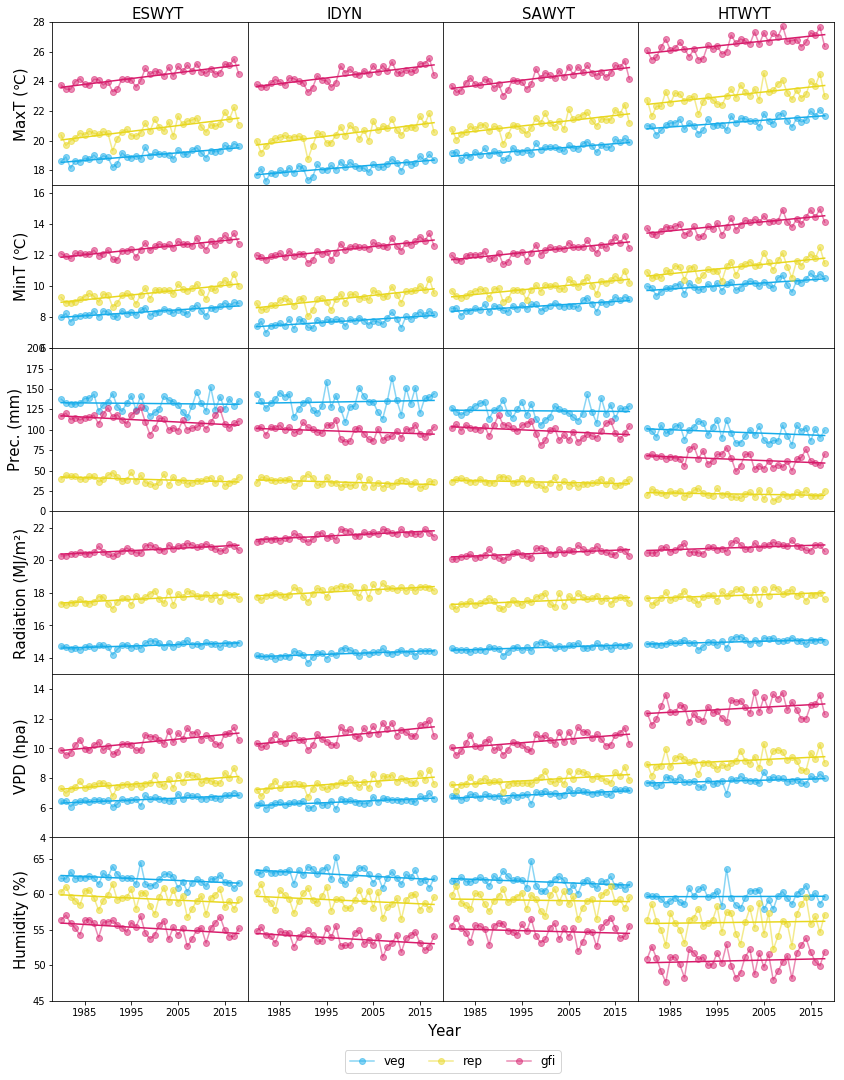

In [10]:
#For all sites
#colors=['red','blue','green','pink']
Wea='ARC5'
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea', '#e8d71e','#d71b6b']
figure, axes=plt.subplots(6,4,figsize=(14,18),sharex=True)
cli_mean=pd.read_csv(data_out+"Climate\cli4all_mean_"+Wea+".csv")
#cli_mean=cli_mean[cli_mean['year']>1979]
for col in range(4): #Nursery
    df=cli_mean[cli_mean['nursery']==nursery[col]]
    for row in range(6): #Env_cli  
        for p in range(1,4): #per
            df0=df[['year',env_cli[row]+'_'+per[p]]].dropna()
            x=df0['year'].tolist()
            y=df0[env_cli[row]+'_'+per[p]].tolist()
            if (col==2) and (row==5):
                axes[row,col].plot(x,y,'o-',alpha=0.5,label=per[p],color=colors[p])
            else:
                axes[row,col].plot(x,y,'o-',alpha=0.5,color=colors[p]) #,color=colors[p]
            a, b = best_fit(x, y)
            yfit = [a + b * xi for xi in x]
            axes[row,col].plot(x, yfit,color=colors[p])
        axes[0,col].set_ylim([17,28])
        axes[1,col].set_ylim([6,16.5])
        axes[2,col].set_ylim([0,200])
        axes[3,col].set_ylim([13,23])
        axes[4,col].set_ylim([4,15])
        axes[5,col].set_ylim([45,68])
        axes[5,col].set_xticks([1985,1995,2005,2015])
        if col>0: axes[row,col].set_yticks([])
    axes[0,col].text(1995,28.2,nursery[col],fontsize=15)
    
handles, labels = axes[5,2].get_legend_handles_labels()            
axes[0,0].set_ylabel('MaxT (\u2103)',fontsize=15)
axes[1,0].set_ylabel('MinT (\u2103)',fontsize=15)
axes[2,0].set_ylabel('Prec. (mm)',fontsize=15)
axes[3,0].set_ylabel('Radiation (MJ/m\u00b2)',fontsize=15)
axes[4,0].set_ylabel('VPD (hpa)',fontsize=15) 
axes[5,0].set_ylabel('Humidity (%)',fontsize=15)

axes[5,2].text(1975, 40,"Year",fontsize=15)
axes[5,2].legend(handles,labels,loc='lower center',
               bbox_to_anchor=(0.05,-0.48),fontsize=12,ncol=3)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.show()
figure.savefig(base_dir+"6_Figures/NP_Plots/S5_MeanClimateInTestingSites_Cli4All_ARC5_R2.tif",dpi=300,bbox_inches='tight')

# Figure S6 - Changes in cv of the six climatic variables

In [195]:
cli_cv=pd.DataFrame(columns=['nursery','year']+[i+"_"+j for j in per for i in env_cli])
for n in nursery:
    for p in per: 
        df_n=pd.read_csv(data_out+n+"_ALL_LINES_clean_"+Wea+".csv")
        df_n=df_n[(df_n['matu'].astype(str)=='nan') | (df_n['matu']<300)]
        df_n=df_n[['year']+[i+"_"+p for i in env_cli]].dropna()
        std=df_n.groupby('year').std().reset_index()
        mean=df_n.groupby('year').mean().reset_index()
        for col in std.columns[1:]: std[col]=100*std[col]/mean[col]
        if (p=='sea'):
            df=std
        else:
            df=df.merge(std,how='left')
    df['nursery']=n
    cli_cv=cli_cv.append(df,sort=False)
cli_cv.to_csv(data_out+"Climate/cli_cv_"+Wea+".csv",index=False)

In [197]:
cli_cv=pd.DataFrame(columns=['nursery','year']+[i+"_"+j for j in per[1:] for i in env_cli])
for n in nursery:
    for yr in range(1980,2019):
        out=[n,yr]
        for p in per[1:]:  
            df_n=pd.read_csv(data_out+"Climate/"+Wea+"_cli4all_clean_"+n+"_"+p+"_"+str(yr)+".csv")
            df_n=df_n[env_cli].dropna()
            res=100*df_n.std(axis=0)/df_n.mean(axis=0)
            out=out+res.tolist()
        cli_cv.loc[len(cli_cv)]=out
cli_cv.to_csv(data_out+"Climate/cli4all_cv_"+Wea+".csv",index=False)

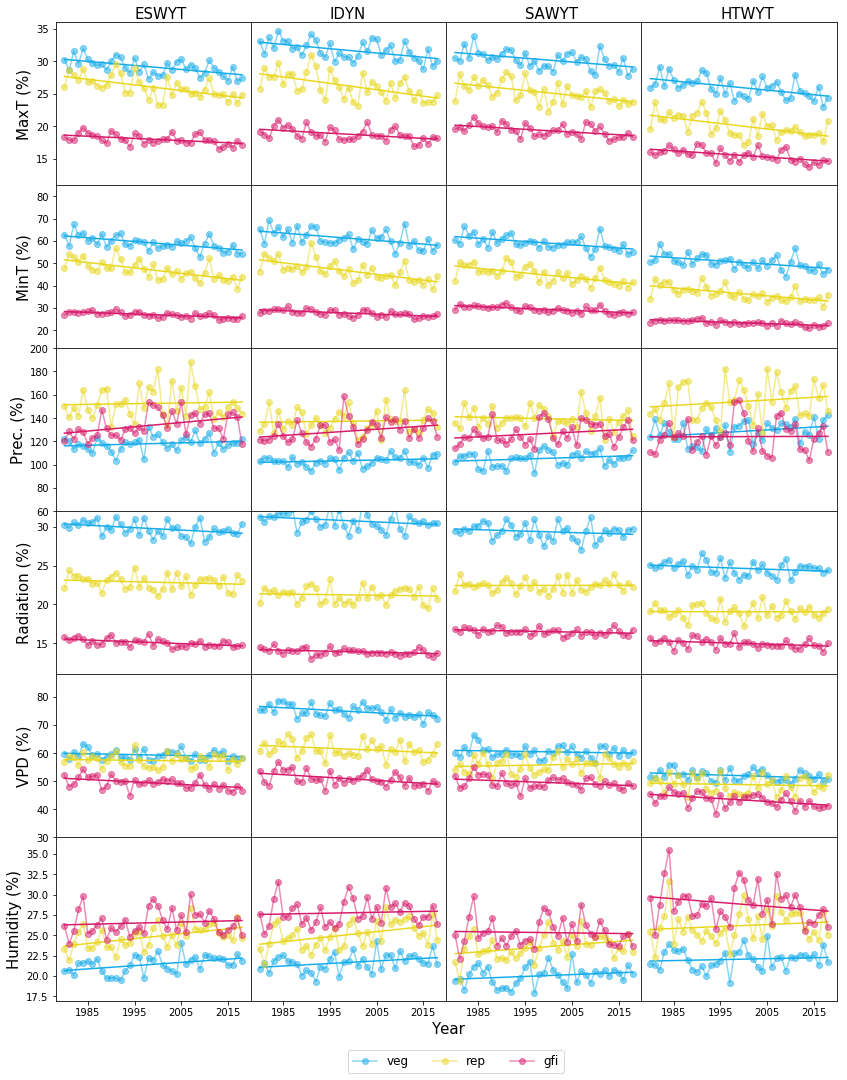

In [9]:
#For all sites
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea', '#e8d71e', '#d71b6b']
cli_cv=pd.read_csv(data_out+"Climate/cli4all_cv_"+Wea+".csv")
figure, axes=plt.subplots(6,4,figsize=(14,18),sharex=True)
for col in range(4): #Nursery
    df=cli_cv[cli_cv['nursery']==nursery[col]]
    for row in range(6): #Env_cli  
        for p in range(1,4): #per
            df0=df[['year',env_cli[row]+'_'+per[p]]].dropna()
            x=df0['year'].tolist()
            y=df0[env_cli[row]+'_'+per[p]].tolist()
            if (col==2) and (row==5):
                axes[row,col].plot(x,y,'o-',label=per[p],alpha=0.5,color=colors[p])
            else:
                axes[row,col].plot(x,y,'o-',alpha=0.5,color=colors[p]) #,color=colors[p]
            a, b = best_fit(x, y)
            yfit = [a + b * xi for xi in x]
            axes[row,col].plot(x, yfit,color=colors[p])
        axes[0,col].set_ylim([11,36])
        axes[1,col].set_ylim([12,85])
        axes[2,col].set_ylim([60,200])
        axes[3,col].set_ylim([11,32])
        axes[4,col].set_ylim([30,88])
        axes[5,col].set_ylim([17,37])
        axes[5,col].set_xticks([1985,1995,2005,2015])
        if col>0: axes[row,col].set_yticks([])
    axes[0,col].text(1995,36.5,nursery[col],fontsize=15)
handles, labels = axes[5,2].get_legend_handles_labels()            
axes[0,0].set_ylabel('MaxT (%)',fontsize=15)
axes[1,0].set_ylabel('MinT (%)',fontsize=15)
axes[2,0].set_ylabel('Prec. (%)',fontsize=15)
axes[3,0].set_ylabel('Radiation (%)',fontsize=15)
axes[4,0].set_ylabel('VPD (%)',fontsize=15) 
axes[5,0].set_ylabel('Humidity (%)',fontsize=15)

axes[5,2].text(1975, 13,"Year",fontsize=15)
axes[5,2].legend(handles,labels,loc='lower center',
               bbox_to_anchor=(0.05,-0.48),fontsize=12,ncol=3)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.show()
figure.savefig(base_dir+"6_Figures/NP_Plots/S6_CVClimateInTestingSites_Cli4All_R2.tif",dpi=300,bbox_inches='tight')

# Figure S7 - Crossover occurrence possibility distribution

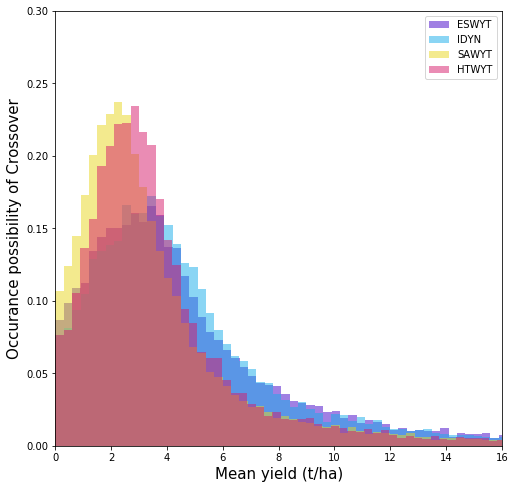

In [12]:
#subplot 4 - Distribution of the cross-over point
#colors=['green','blue','red','#9b59b6'] #['ESWYT','IDYN','HTWYT','SAWYT']
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea',  '#e8d71e','#d71b6b']
figure, ax=plt.subplots(1,1,figsize=(8,8))
df=pd.read_csv(base_dir+'6_Figures/Figure1/location-of-real-cross.csv')
df=df[(df['x']>0)&(df['x']<18)]
for n in range(4):
    df1=df[df['nursery']==nursery[n]]
    ax.hist(x=df1['x'],bins=60,density=True,color=colors[n],label=nursery[n],alpha=0.5)
ax.set_ylim([0,0.3])
handles, labels = ax.get_legend_handles_labels()
order = [0,1,2,3]
ax.legend(handles,labels,loc=0)
ax.set_xlabel('Mean yield (t/ha)',fontsize=15)
ax.set_ylabel('Occurance possibility of Crossover',fontsize=15)
ax.set_xlim([0,16])
figure.savefig(base_dir+"6_Figures/NP_Plots/S7_crossover_possibility_R2.jpg",dpi=300,bbox_inches='tight')

In [ ]:
def trendline(xd, yd, order=1, c='r', alpha=1, Rval=False):
    """Make a line of best fit"""
    #Calculate trendline
    coeffs = np.polyfit(xd, yd, order)
    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0
    minxd = np.min(xd)
    maxxd = np.max(xd)
    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept
    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)
    #Calculate R Squared
    p = np.poly1d(coeffs)
    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot
    if not Rval:
        #Plot R^2 value
        plt.text(0.8 * maxxd + 0.2 * minxd, 0.8 * np.max(yd) + 0.2 * np.min(yd), '$R^2 = %0.2f$' % Rsqr)
    else:
        #Return the R^2 value:
        return Rsqr

# Figure S8 - Yield-Cross-over_predictionByModel3_withDifferntAlpha

In [270]:
# Figure S8 Why are choose such model
from scipy import stats
def r2(x,y):
    return stats.pearsonr(x,y)[0]**2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from functools import reduce
#Model Remove Ej
env_cli=['tmax','tmin','pre','rad','vpd','hud']
title=['sea','veg+rep+gfi']
#alpha=[10,1,0.1,0.01,0.001,0]
alpha=[0]
for a in alpha:
    yld_train=pd.DataFrame(columns=['nursery','realyld','simyld'])
    yld_test=pd.DataFrame(columns=['nursery','realyld','simyld'])
    name=[[x+'_'+y+'SQ',x+'_'+y] for x in env_cli for y in per[1:]]
    name=reduce(lambda x, y: x+y, name)
    for n in nursery:
        df_nocheck=pd.read_csv(data_out+n+"_ALL_LINES_clean_"+Wea+".csv")
        df_nocheck=df_nocheck[['E!','G!','year','yld']+[x+'_'+per[pe] for pe in range(1,4) for x in env_cli]]
        df_nocheck=df_nocheck.dropna(axis=0)
        SQ=[x for x in name if 'SQ' in x]
        for col in SQ: df_nocheck[col]=df_nocheck[col[:(len(col)-2)]]**2
        for yr in df_nocheck['year'].unique():
            df0=df_nocheck[(df_nocheck['year']==yr)] #&(df_yr['matu']>0)
            df0=df0.drop(['year'],axis=1).dropna()
            df0['yld']=df0['yld'].astype(float)
            temp=df0[['G!','yld']].groupby('G!').mean().reset_index()
            temp.loc[:,'Gi']=[x-temp['yld'].mean() for x in temp['yld']]
            df0=df0.merge(temp[['G!','Gi']],how='left')
            temp=df0[['E!','yld']].groupby('E!').mean().reset_index()
            temp.loc[:,'Ej']=[x-temp['yld'].mean() for x in temp['yld']]
            df0=df0.merge(temp[['E!','Ej']],how='left')
            df0.loc[:,'yld_a']=df0['yld']-df0['yld'].mean()-df0['Gi']-df0['Ej']
            for g in df0['G!'].unique():
                yld_temp_train=pd.DataFrame()
                yld_temp_test=pd.DataFrame()
                df=df0[df0['G!']==g].loc[:,['yld','E!','Gi','Ej','yld_a']+name]
                if df.shape[0]>=30: #make sure it is a large sample
                    y=df['yld_a']
                    X=df[name+['Gi','Ej','yld']]
                    #X=df[name]
                    grand_mean=df0['yld'].mean()
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=31)
                    if a==0:
                        #X=sm.add_constant(X_train.loc[:,name])
                        #OLS=sm.OLS(endog=y_train,exog=X).fit
                        lm=LinearRegression()
                        lm.fit(X_train.loc[:,name],y_train)
                        #predictions_train=OLS.predict(X)+X_train.loc[:,'Gi']+grand_mean+X_train.loc[:,'Ej']
                        #X=sm.add_constant(X_train.loc[:,name])
                        #predictions_test=OLS.predict(X)+X_test.loc[:,'Gi']+grand_mean+X_test.loc[:,'Ej']
                        predictions_train=lm.predict(X_train.loc[:,name])+X_train.loc[:,'Gi']+grand_mean+X_train.loc[:,'Ej']
                        #X=sm.add_constant(X_test.loc[:,name])
                        predictions_test=lm.predict(X_test.loc[:,name])+X_test.loc[:,'Gi']+grand_mean+X_test.loc[:,'Ej']
                    else:
                        lasso=Lasso(alpha=a,max_iter=10e8) #alpha=0.1,max_iter=10e6
                        lasso.fit(X_train.loc[:,name],y_train)
                        predictions_train=lasso.predict(X_train.loc[:,name])+X_train.loc[:,'Gi']+grand_mean+X_train.loc[:,'Ej']
                        predictions_test=lasso.predict(X_test.loc[:,name])+X_test.loc[:,'Gi']+grand_mean+X_test.loc[:,'Ej']
                    yld_temp_train['realyld']=X_train.loc[:,'yld']#y_train+X_train.loc[:,'Gi']X_train.loc[:,'Ej']+grand_mean
                    yld_temp_train['simyld']=predictions_train
                    yld_temp_train['nursery']=n
                    yld_temp_test['realyld']=X_test.loc[:,'yld']#y_test+X_test.loc[:,'Gi']+X_test.loc[:,'Ej']+grand_mean
                    yld_temp_test['simyld']=predictions_test
                    yld_temp_test['nursery']=n
                    #yld_temp=yld_temp[(yld_temp['simyld']>0)&(yld_temp['simyld']<18)]
                    #if np.corrcoef(yld_temp_test['realyld'],yld_temp_test['simyld'])[0,1]**2>=0.5:
                    yld_train=yld_train.append(yld_temp_train,sort=True)
                    yld_test=yld_test.append(yld_temp_test,sort=True)
    yld_train.to_csv(data_out+'Yld_prediction_train_'+Wea+'_'+str(a)+'_test.csv',index=False)
    yld_test.to_csv(data_out+'Yld_prediction_test_'+Wea+'_'+str(a)+'_test.csv',index=False)

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: divide by zero encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: invalid value encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\robust\norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\robust\norms.py:267: RuntimeWarning: invalid value en

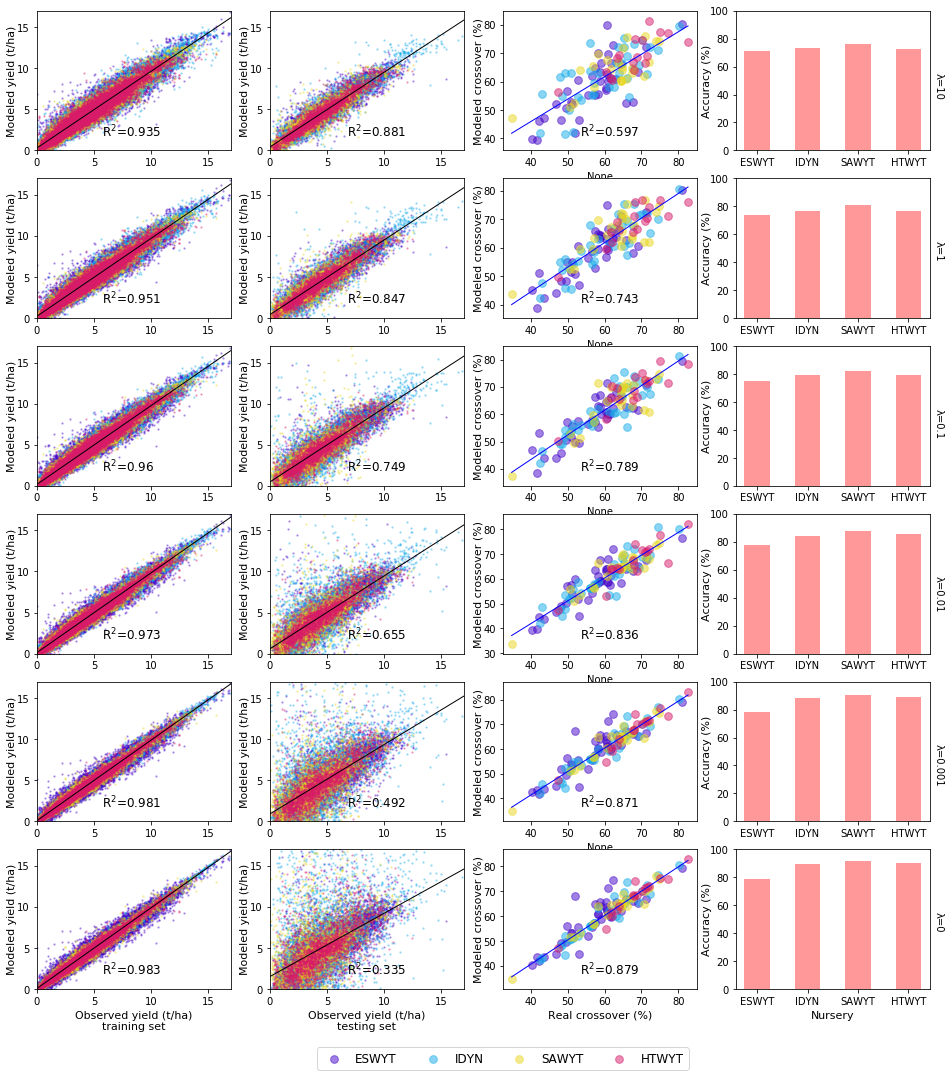

In [13]:
#Figures
#in_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\6_Figures\\"
alpha=[10,1,0.1,0.01,0.001,0]
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea', '#e8d71e', '#d71b6b']
fig,ax=plt.subplots(nrows=6,ncols=4,figsize=(16,18))

for row in range(6): #alpha
    al=alpha[row]
    #for col in range(4): #Yield_train, Yield_test, GEI, Crossover
    col=0 #Yield_Train
    yld=pd.read_csv(data_out+'Yld_prediction_train_'+Wea+'_'+str(alpha[row])+'_test.csv')
    yld=yld.dropna()
    for n in range(4):#nursery:
        df=yld[yld['nursery']==nursery[n]]
        if row==5:
            ax[row,col].scatter(df['realyld'].values,df['simyld'].values,marker='o',s=2,alpha=0.3,color=colors[n],label=nursery[n])
        else:
            ax[row,col].scatter(df['realyld'].values,df['simyld'].values,marker='o',s=2,alpha=0.3,color=colors[n])
    sns.regplot(yld['realyld'].values,yld['simyld'].values,ax=ax[row,col],scatter=False,ci=0,line_kws={'color':'black','lw':1})
    r2=round(np.corrcoef(yld['realyld'],yld['simyld'])[0,1]**2,3)
    ax[row,col].set_xlim([0,17])
    ax[row,col].set_ylim([0,17])
    posx=ax[row,col].get_xlim()[0]+(ax[row,col].get_xlim()[1]-ax[row,col].get_xlim()[0])/3
    posy=ax[row,col].get_ylim()[0]+(ax[row,col].get_ylim()[1]-ax[row,col].get_ylim()[0])/10
    ax[row,col].text(posx,posy,'R$^2$='+str(r2),fontsize=12)

    col=1 #Yield_Test
    yld=pd.read_csv(data_out+'Yld_prediction_test_'+Wea+'_'+str(alpha[row])+'_test.csv')
    yld=yld.dropna()
    for n in range(4):#nursery:
        df=yld[yld['nursery']==nursery[n]]
        ax[row,col].scatter(df['realyld'].values,df['simyld'].values,marker='o',s=2,alpha=0.3,color=colors[n])
    sns.regplot(yld['realyld'].values,yld['simyld'].values,ax=ax[row,col],scatter=False,ci=0,line_kws={'color':'black','lw':1})
    r2=round(np.corrcoef(yld['realyld'].values,yld['simyld'].values)[0,1]**2,3)
    ax[row,col].set_xlim([0,17])
    ax[row,col].set_ylim([0,17])
    posx=ax[row,col].get_xlim()[0]+(ax[row,col].get_xlim()[1]-ax[row,col].get_xlim()[0])/2.5
    posy=ax[row,col].get_ylim()[0]+(ax[row,col].get_ylim()[1]-ax[row,col].get_ylim()[0])/10
    ax[row,col].text(posx,posy,'R$^2$='+str(r2),fontsize=12)    
    
    col=2 # Cross-over
    yld=pd.read_csv(data_out+"NoEj_"+str(al)+"_cross_over_"+Wea+".csv")
    sns.regplot(100*yld['cross_r']/(yld['nline']*(yld['nline']-1)/2),
                100*yld['cross_s']/(yld['nline']*(yld['nline']-1)/2),ax=ax[row,col],
                scatter_kws={"s": 0},line_kws={'lw':1},color='b',ci=0,robust=True,truncate=True)
    for n in range(4):#nursery:
        df=yld[yld['nursery']==nursery[n]]
        ax[row,col].scatter(np.asarray(100*df['cross_r']/(df['nline']*(df['nline']-1)/2)),
                            100*df['cross_s']/(df['nline']*(df['nline']-1)/2),marker='o',
                            color=colors[n],s=60,alpha=0.5,label=nursery[n])
    r2=round(np.corrcoef(100*yld['cross_r']/(yld['nline']*(yld['nline']-1)/2),
                         100*yld['cross_s']/(yld['nline']*(yld['nline']-1)/2))[0,1]**2,3)
    posx=ax[row,col].get_xlim()[0]+(ax[row,col].get_xlim()[1]-ax[row,col].get_xlim()[0])/2.5
    posy=ax[row,col].get_ylim()[0]+(ax[row,col].get_ylim()[1]-ax[row,col].get_ylim()[0])/10
    ax[row,col].text(posx,posy,'R$^2$='+str(r2),fontsize=12)
    
    col=3 # prediction accuarcy
    stack=['Y-Y','N-N','Y-N','N-Y']
    df0=yld[['nursery','Y-Y','N-N','Y-N','N-Y']]
    colors1 = ['#FF9999', '#00BFFF','#CAE1FF','#FFDEAD','#C1FFC1']
    df0=df0.groupby('nursery').mean().reset_index()[['nursery','Y-Y','N-N','Y-N','N-Y']]
    df0['sum']=df0[stack].sum(axis=1)
    for col in stack: df0[col]=100*df0[col]/df0['sum']
    barWidth=0.5
    s=0
    YY=[df0.loc[0,stack[s]],df0.loc[2,stack[s]],df0.loc[1,stack[s]],df0.loc[3,stack[s]]]
    s=1
    NN=[df0.loc[0,stack[s]],df0.loc[2,stack[s]],df0.loc[1,stack[s]],df0.loc[3,stack[s]]]
    s=2
    YN=[df0.loc[0,stack[s]],df0.loc[2,stack[s]],df0.loc[1,stack[s]],df0.loc[3,stack[s]]]
    s=3
    NY=[df0.loc[0,stack[s]],df0.loc[2,stack[s]],df0.loc[1,stack[s]],df0.loc[3,stack[s]]]
    if row==5:
        ax[row,3].bar(nursery,YY,color=colors1[0],width=barWidth,label='Y-Y')
        ax[row,3].bar(nursery,NN,color=colors1[0],bottom=np.array(YY),width=barWidth,label='N-N')
        #ax[row,3].bar(nursery,YN,color=colors1[2],bottom=np.add(NN,YY),width=barWidth,label='Y-N',alpha=0.2)
        #ax[row,3].bar(nursery,NY,color=colors1[3],bottom=np.add(np.add(YY,NN),YN),width=barWidth,label='N-Y',alpha=0.2)
    else:
        ax[row,3].bar(nursery,YY,color=colors1[0],width=barWidth)
        ax[row,3].bar(nursery,NN,color=colors1[0],bottom=np.array(YY),width=barWidth)
        #ax[row,3].bar(nursery,YN,color=colors1[2],bottom=np.add(NN,YY),width=barWidth,alpha=0.2)
        #ax[row,3].bar(nursery,NY,color=colors1[3],bottom=np.add(np.add(YY,NN),YN),width=barWidth,alpha=0.2)
        #ax[row,0].set_xlabel()
        #ax[row,1].set_xlabel()
        #ax[row,2].set_xlabel()
        #ax[row,3].set_xlabel()
    ax[row,3].text(3.5,50,'λ='+str(alpha[row]),fontsize=10,rotation=-90)
    ax[row,0].set_ylabel('Modeled yield (t/ha)',fontsize=11,labelpad=0)
    ax[row,1].set_ylabel('Modeled yield (t/ha)',fontsize=11,labelpad=0)
    ax[row,2].set_ylabel('Modeled crossover (%)',fontsize=11,labelpad=0)
    ax[row,3].set_ylabel('Accuracy (%)',fontsize=11,labelpad=-2)
    ax[row,3].set_ylim([0,100])

ax[5,0].set_xlabel('Observed yield (t/ha)\ntraining set',fontsize=11)
ax[5,1].set_xlabel('Observed yield (t/ha)\ntesting set',fontsize=11)
ax[5,2].set_xlabel('Real crossover (%)',fontsize=11)
ax[5,3].set_xlabel('Nursery',fontsize=11)
#ax[2,0].text(-4,-5,'Simulated values', fontsize=20,rotation=90)
handles, labels = ax[5,2].get_legend_handles_labels()
ax[5,2].legend(handles,nursery,loc='lower center',bbox_to_anchor=(0.0,-0.62),fontsize=12,ncol=4)
fig.savefig(base_dir+"6_Figures/NP_Plots/S8_Yield-Cross-over_predictionByModel3_withDifferntAlpha_R2.jpg",dpi=300,bbox_inches='tight')

In [338]:
result=pd.DataFrame(columns=['alpha','nursery','accuracy'])
for al in alpha:
    yld=pd.read_csv(data_out+"NoEj_"+str(al)+"_cross_over_"+Wea+".csv")
    yld=yld[['nursery','Y-Y','N-N','Y-N','N-Y']]
    yld=yld.groupby('nursery').mean().reset_index()
    yld['accuracy']=(yld['Y-Y']+yld['N-N'])/(yld['Y-Y']+yld['N-N']+yld['Y-N']+yld['N-Y'])
    yld['alpha']=al
    result=result.append(yld[['alpha','nursery','accuracy']])
result.groupby('alpha').mean().reset_index()

,alpha,accuracy
0,0.000,0.875511
1,0.001,0.865209
2,0.010,0.838971
3,0.100,0.788776
4,1.000,0.770236
5,10.000,0.732232


# Figure 9 - sensitivty analysis of results to alpha

In [15]:
#Plotting
#Color gradients
def hex_to_RGB(hex):
  ''' "#FFFFFF" -> [255,255,255] '''
  # Pass 16 to the integer function for change of base
  return [int(hex[i:i+2], 16) for i in range(1,6,2)]
def RGB_to_hex(RGB):
  ''' [255,255,255] -> "#FFFFFF" '''
  # Components need to be integers for hex to make sense
  RGB = [int(x) for x in RGB]
  return "#"+"".join(["0{0:x}".format(v) if v < 16 else
            "{0:x}".format(v) for v in RGB])
def color_dict(gradient):
  ''' Takes in a list of RGB sub-lists and returns dictionary of
    colors in RGB and hex form for use in a graphing function
    defined later on '''
  return {"hex":[RGB_to_hex(RGB) for RGB in gradient],
      "r":[RGB[0] for RGB in gradient],
      "g":[RGB[1] for RGB in gradient],
      "b":[RGB[2] for RGB in gradient]}

def linear_gradient(start_hex, finish_hex="#FFFFFF", n=10):
  ''' returns a gradient list of (n) colors between
    two hex colors. start_hex and finish_hex
    should be the full six-digit color string,
    inlcuding the number sign ("#FFFFFF") '''
  # Starting and ending colors in RGB form
  s = hex_to_RGB(start_hex)
  f = hex_to_RGB(finish_hex)
  # Initilize a list of the output colors with the starting color
  RGB_list = [s]
  # Calcuate a color at each evenly spaced value of t from 1 to n
  for t in range(1, n):
    # Interpolate RGB vector for color at the current value of t
    curr_vector = [
      int(s[j] + (float(t)/(n-1))*(f[j]-s[j]))
      for j in range(3)
    ]
    # Add it to our list of output colors
    RGB_list.append(curr_vector)
  return color_dict(RGB_list)

In [343]:
result=pd.DataFrame(columns=['alpha','nursery','year','cross'])
for a in range(len(alpha)):
    df=pd.read_csv(data_out+"NoEj_"+str(alpha[a])+"_prediction_gxe_crossover_clean_"+Wea+"_SiteSeasonGt5_nocheck.csv")
    df['cross']=100*df['cross-over']/(df['nline']*(df['nline']-1)/2)
    df=df[['nursery','year','cross']].groupby(['nursery','year']).mean().reset_index()
    df['alpha']=alpha[a]
    result=result.append(df,sort=True)
#result.to_csv(data_out+"Alpha_sensitivity_for_Crossover_perdiction.csv",index=False)

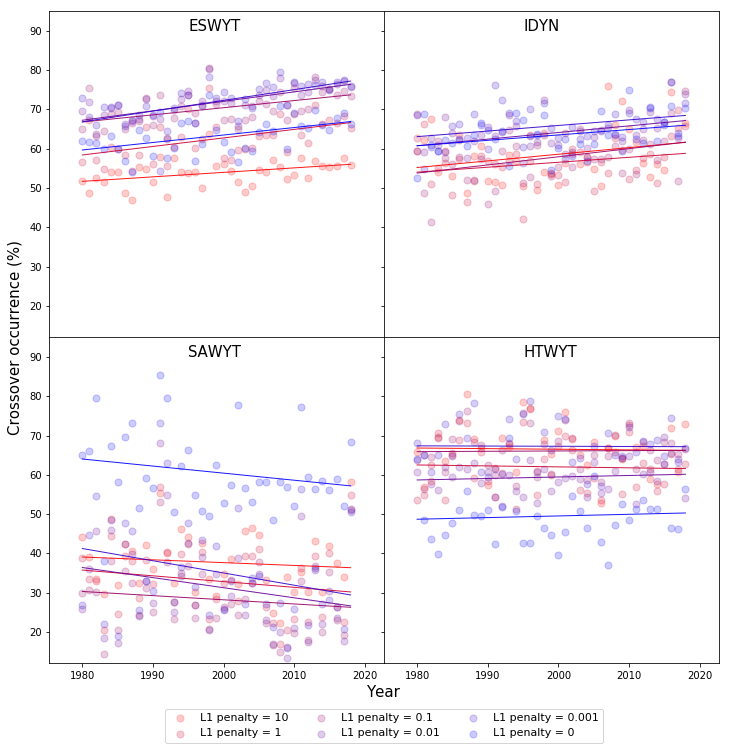

In [16]:
#Sensitivity analysis
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
fig, ax=plt.subplots(nrows=2,ncols=2,figsize=(12,12),sharex=True,sharey=True)
result=pd.read_csv(data_out+"Alpha_sensitivity_for_Crossover_perdiction.csv")
alpha=['10','1','0.1','0.01','0.001','0']
color_ramp=linear_gradient("#FF0000","#0000FF",6)['hex']
for n in range(4): #nursery
    for a in range(len(alpha)):
        df=result[(result['alpha']==float(alpha[a])) & (result['nursery']==nursery[n])]
        x=np.asarray(df['year']).astype(float)
        y=np.asarray(df['cross']).astype(float)
        if (n==3):
            sns.regplot(x,y,ax=ax[int(n/2),n%2],ci=0,line_kws={'lw':1,'alpha': 0.9,'color':color_ramp[a]},
                        scatter_kws={'s':50,'alpha':0.2,'color':color_ramp[a]},truncate=True,
                        robust=False,label='L1 penalty = '+alpha[a])
        else:
            sns.regplot(x,y,ax=ax[int(n/2),n%2],ci=0,line_kws={'lw':1,'alpha': 0.9,'color':color_ramp[a]},
                        scatter_kws={'s':50,'alpha':0.2,'color':color_ramp[a]},truncate=True,
                        robust=False)
    #ax[int(n/2),n%2].set_xlabel('Year',fontsize=15)
    #ax[int(n/2),n%2].set_ylabel('Crossover occurrence (%)')
    ax[int(n/2),n%2].set_ylim([12,95])
    ax[int(n/2),n%2].text(1995,90,nursery[n],fontsize=15)
plt.subplots_adjust(hspace=0,wspace=0)

handles, labels = ax[1,1].get_legend_handles_labels()
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Crossover occurrence (%)",fontsize=15)
plt.legend(handles,labels,loc='lower center',bbox_to_anchor=(0.5,-0.13),fontsize=11,ncol=3)
fig.savefig(base_dir+"6_Figures/NP_Plots/S9_SensitivityAnalysis_R2.jpg",dpi=300,bbox_inches='tight')

# Figure 10_ sensitivity to weather dataset

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


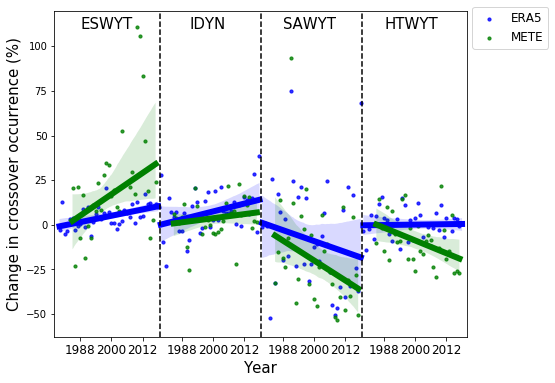

In [27]:
#Combine all plots in one - three stage climate
#colors=['green','blue','red','#9b59b6'] #['ESWYT','IDYN','HTWYT','SAWYT']
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea', '#e8d71e','#d71b6b',]
colors_start=['#d3ffbe','#bee8ff','#ffbebe','#ffbeff']
colors_end=['#269b00','#004c73','#9b0000','#4c0073']
markers=['.','+','x','*']
a=0.1
wea=['ARC5','METE']
color=['blue','green']
wea_name=['ERA5','METE']

fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(7.4,6))
rubt1or0 = True
for w in range(2):      
    out=pd.read_csv(data_out+'NoEj_'+str(a)+'_prediction_gxe_crossover_clean_'+wea[w]+'_SiteSeasonGt5_nocheck.csv')
    for n in range(4): 
        df0=out[out['nursery']==nursery[n]]
        df0['cross']=100*df0['cross-over']/(df0['nline']*(df0['nline']-1)/2)
        df=df0[['year','cross']].apply(pd.to_numeric)
        df=df.groupby('year')['cross'].mean().reset_index()
        x=np.asarray(df.year.unique())+n*39
        X_opt=np.asarray(x)
        X_opt=sm.add_constant(X_opt)
        y=np.asarray(df['cross'])
        OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
        bs=OLS.params[0]+OLS.params[1]*x.min()
        cross=100*(df['cross']-bs)/bs
        if n==0 and w==0:
            sns.regplot(x.astype('float'),cross,scatter=True,ax=ax,scatter_kws={"s": 10},label='ERA5',
                    line_kws={'lw':6},marker='o',color=color[w],truncate=True,robust=rubt1or0)
        elif n==0 and w==1:
            sns.regplot(x.astype('float'),cross,scatter=True,ax=ax,scatter_kws={"s": 10},label='METE',
                    line_kws={'lw':6},marker='o',color=color[w],truncate=True,robust=rubt1or0)
        else:
            sns.regplot(x.astype('float'),cross,scatter=True,ax=ax,scatter_kws={"s": 10},
                    line_kws={'lw':6},marker='o',color=color[w],truncate=True,robust=rubt1or0)

ax.set_xlim([1978,2137])
ax.axvline(2018.5,color='black',ls='--')
ax.axvline(2057.5,color='black',ls='--')
ax.axvline(2096.5,color='black',ls='--')
ax.text(1988,110,nursery[0],fontsize=15)
ax.text(2030,110,nursery[1],fontsize=15)
ax.text(2066,110,nursery[2],fontsize=15)
ax.text(2105,110,nursery[3],fontsize=15)

#ax.set_xticks([])
labels=[1988,2000,2012,2027,2039,2051,2066,2078,2090,2105,2117,2129]
labels_year=[1988,2000,2012,1988,2000,2012,1988,2000,2012,1988,2000,2012]
ax.set_xticks(labels)
ax.set_xticklabels(labels_year,fontsize=12) 
ax.set_ylabel("Change in crossover occurrence (%)",fontsize=15)
ax.set_xlabel("Year",fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels,loc='lower right',fontsize=12,bbox_to_anchor=(1.21,0.865))
fig.savefig(base_dir+"6_Figures/NP_Plots/S11_differenceBetweenWeather_R2.png",dpi=300,bbox_inches='tight')

# Figure S11 - Observed yield trends

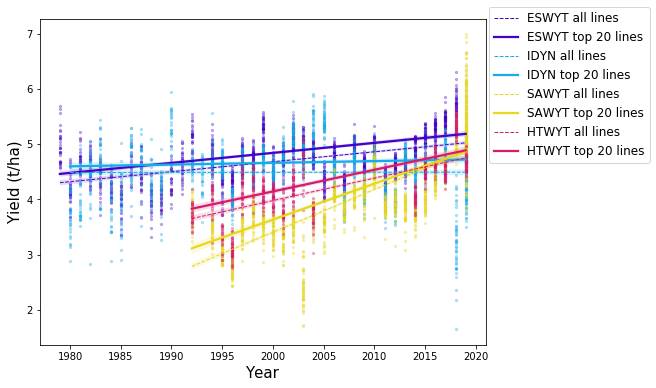

In [17]:
nursery=['ESWYT','IDYN','SAWYT','HTWYT']
colors=['#4203c9', '#16acea', '#e8d71e','#d71b6b']
fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(8,6))
for n in range(len(nursery)):
    df=pd.read_csv(base_dir+"/1_Data/"+nursery[n]+"_yld.csv")
    df['G!']=df['sid'].astype('str')+'_'+df['gen']
    df=df[['year','G!','yld']]
    df.loc[:,'yld']=df.loc[:,'yld'].replace(r'^\s+$', np.nan, regex=True).astype('float')
    df=df.dropna()
    df.loc[:,'yld']=df['yld'].astype('float')
    df=df.groupby(['year','G!']).mean().reset_index()
    axs.scatter(df['year'],df['yld'],c=colors[n],alpha=0.3,s=5)
    sns.regplot(df['year'],df['yld'],ax=axs,truncate=True,scatter=False,line_kws={'lw': 1, 'color': colors[n],'linestyle':'--'},label=nursery[n]+" all lines")
    
    yld=pd.DataFrame(columns=['year','yld'])
    for yr in df.year.unique():
        temp=df[df['year']==yr][['year','yld']]
        temp=temp.sort_values(by=['yld'],ascending=False)
        temp=temp.iloc[:20,]
        yld=yld.append(temp)
    sns.regplot(yld['year'].astype('float'),yld['yld'].astype('float'),ax=axs,truncate=True,scatter=False,color=colors[n],line_kws={'color': colors[n],'linestyle':'-'},label=nursery[n]+" top 20 lines")
handles, labels = axs.get_legend_handles_labels()
axs.set_xlabel('Year',fontsize=15)
axs.set_ylabel('Yield (t/ha)',fontsize=15)
axs.legend(handles[:8],labels[:8],loc='lower right',fontsize=12,bbox_to_anchor=(1.38,0.54))
fig.savefig(base_dir+"6_Figures/NP_Plots/S10_ObservedYieldTrends_R2.jpg",dpi=300,bbox_inches = 'tight')

# Table 1 - Which climate variable has the highest explaination power

In [26]:
from functools import reduce
from sklearn.linear_model import Lasso
import scipy

In [64]:
#Windows
base_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\"
in_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\"
data_out="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\2_Results\\NP_data\\"#P1_Figure_1\\"
plot_out="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\1.0_Cross_Over\\6_Figures\\NP_Plots\\"
weat_dir="E:\\Dropbox (RSG)\\Works\\CurrentProcessing\\Wheat_Phenotypic\\Weather\\ARC5\\"  #Metblue
#Mac:
#base_dir="/Users/weixiong/Dropbox (RSG)/Works/CurrentProcessing/Wheat_Phenotypic/1_Cross_Over/"
#in_dir=base_dir+"1_Data/"
#os.chdir(base_dir+"6_Figures/NCC_Plot1")#P1_Figure_1/"
#weat_dir="/Users/weixiong/Dropbox (RSG)/Works/CurrentProcessing/Wheat_Phenotypic/Weather/Output/"
nursery=['ESWYT','IDYN','HTWYT','SAWYT','IWWYT_IRR','IWWYT_SA']
per=['sea','veg','rep','gfi']
env_cli=[['tmax','tmin'],['pre'],['rad'],['vpd'],['hud'],['tmax','tmin','pre'],['tmax','tmin','pre','rad'],
         ['tmax','tmin','pre','rad','vpd'],['tmax','tmin','pre','rad','vpd','hud']]
per=['sea','veg','rep','gfi']
alpha=0
alpha=[10,1,0.01,0.001,0,0.1]
Wea='ARC5' #'ARC5' 
results=pd.DataFrame(columns=['climate','r2'])
al=0.1
p=1 #season
for en in range(9):
#if al==0.1:
    cross_over=pd.DataFrame(columns=['nursery','year','season','nline','nsite','cross_r','cross_s','Y-Y','N-N','Y-N','N-Y','accurary'])
    yld_train=pd.DataFrame(columns=['nursery','year','G!','E!','realyld','simyld'])
    name=[[x+'_'+y+'SQ',x+'_'+y] for x in env_cli[en] for y in per[1:]]
    name=reduce(lambda x, y: x+y, name) 
    #outfile='WithEj_'+str(al)+'_fit_quad_tmatmiprravphu_vegrefgif_'+Wea+'_WithGi.csv'
    out=pd.DataFrame(columns=['nursery','year','G!','constant']+name+['r2','pvalue','Gi']) #Fit table
    for n in nursery[:4]:
        df_nocheck=pd.read_csv(data_out+n+"_ALL_LINES_clean_"+Wea+".csv")
        df_nocheck=df_nocheck[['E!','G!','year','yld']+[x+'_'+per[pe] for pe in range(1,4) for x in env_cli[en]]]
        df_nocheck=df_nocheck.dropna(axis=0)
        #name of climate columns
        SQ=[x for x in name if 'SQ' in x]
        for col in SQ: df_nocheck[col]=df_nocheck[col[:(len(col)-2)]]**2
        for yr in df_nocheck['year'].unique():
            df0=df_nocheck[(df_nocheck['year']==yr)] #&(df_yr['matu']>0)
            if len(df0['E!'].unique())>=5:
                df0=df0.drop(['year'],axis=1).dropna()
                df0['yld']=df0['yld'].astype(float)
                temp=df0[['G!','yld']].groupby('G!').mean().reset_index()
                temp.loc[:,'Gi']=[x-temp['yld'].mean() for x in temp['yld']]
                df0=df0.merge(temp[['G!','Gi']],how='left')
                temp=df0[['E!','yld']].groupby('E!').mean().reset_index()
                temp.loc[:,'Ej']=[x-temp['yld'].mean() for x in temp['yld']]
                df0=df0.merge(temp[['E!','Ej']],how='left')
                df0.loc[:,'yld_a']=df0['yld']-df0['yld'].mean()-df0['Gi']#-df0['Ej']
                #####################Estimate GEI table###############################
                yld_train=pd.DataFrame(columns=['G!','E!','yld_a','yld_s'])
                for g in df0['G!'].unique():
                    yld_train_temp=pd.DataFrame()
                    df=df0[df0['G!']==g].loc[:,['E!','yld_a','Gi']+name]
                    #for col in name: df[col]=(df[col]-df[col].mean())/df[col].mean()
                    if al==0:
                        y=np.asarray(df['yld_a'])
                        X=np.asarray(df[name])
                        X=sm.add_constant(X)
                        OLS=sm.OLS(endog=y,exog=X).fit()
                        predictions_train=OLS.predict(X)
                        out.loc[len(out)]=[n,yr,g]+OLS.params.tolist()+list(scipy.stats.pearsonr(y,predictions_train))+[df.Gi.mean()]
                    else:
                        y=df['yld_a']
                        X=df[name]
                        lasso=Lasso(alpha=al,max_iter=10e8)
                        lasso.fit(X,y)
                        predictions_train=lasso.predict(X)
                        out.loc[len(out)]=[n,yr,g,lasso.intercept_]+lasso.coef_.tolist()+list(scipy.stats.pearsonr(y,predictions_train))+[df.Gi.mean()]
                    yld_train_temp['yld_a']=y
                    yld_train_temp['yld_s']=predictions_train
                    yld_train_temp['G!']=g
                    yld_train_temp['E!']=df['E!'].tolist()
                    yld_train=yld_train.append(yld_train_temp,sort=True)
                #######################################################################
                ###################Estimate CROSS-OVER table ##########################
                df0=df0.merge(yld_train[['G!','E!','yld_s']],how='left',on=['G!','E!'])
                df0['yld_real']=df0['yld_a']+df0['yld'].mean()+df0['Gi']+df0['Ej']
                #df0['yld_s']=yld_train['yld_s'].tolist()
                df0['yld_sim']=df0['yld_s']+df0['yld'].mean()+df0['Gi']+df0['Ej']
                fit_real=[]
                fit_sim=[]
                fit_value=['yld_real','yld_sim']
                fit_name=['real','sim']
                temp=df0.pivot_table(index='G!',columns='E!',values='yld_real').reset_index()
                real_mean=np.nanmean(temp.iloc[:,1:],axis=0) #Environmental Mean
                temp=df0.pivot_table(index='G!',columns='E!',values='yld_sim').reset_index()
                sim_mean=np.nanmean(temp.iloc[:,1:],axis=0) #Environmental Mean
                #Estimate real cross
                for f in range(2):
                    df_temp=df0.pivot_table(index='G!',columns='E!',values=fit_value[f]).reset_index()                                               
                    df_temp=np.asarray(df_temp.iloc[:,1:])
                    for i in range(df_temp.shape[0]):
                        temp=pd.DataFrame()
                        temp['yld']=df_temp[i,:]
                        temp['mean']=np.nanmean(df_temp,axis=0)
                        temp=temp.dropna()
                        X_opt = np.asarray(temp['mean'])
                        X_opt=sm.add_constant(X_opt)
                        y=np.asarray(temp['yld'])
                        OLS = sm.OLS(endog = y, exog = X_opt).fit()
                        if f==0:
                            fit_real=fit_real+[OLS.params.tolist()]
                        elif f==1:
                            fit_sim=fit_sim+[OLS.params.tolist()]
                cross=pd.DataFrame()
                gen=np.asarray([[i,j] for i in range(len(fit_real)-1) for j in range(i+1,len(fit_real))])
                cross['a1_r']=[fit_real[i][1] for i in gen[:,0]] 
                cross['b1_r']=[fit_real[i][0] for i in gen[:,0]]
                cross['a2_r']=[fit_real[i][1] for i in gen[:,1]] 
                cross['b2_r']=[fit_real[i][0] for i in gen[:,1]]
                cross['a1_s']=[fit_sim[i][1] for i in gen[:,0]] 
                cross['b1_s']=[fit_sim[i][0] for i in gen[:,0]]
                cross['a2_s']=[fit_sim[i][1] for i in gen[:,1]] 
                cross['b2_s']=[fit_sim[i][0] for i in gen[:,1]]
                cross['r']=(cross['b2_r']-cross['b1_r'])/(cross['a1_r']-cross['a2_r'])
                cross['s']=(cross['b2_s']-cross['b1_s'])/(cross['a1_s']-cross['a2_s'])
                cross['cross_r']=[1 if (x>real_mean.min())&(x<real_mean.max()) else 0 for x in cross['r']]
                cross['cross_s']=[1 if (x>sim_mean.min())&(x<sim_mean.max()) else 0 for x in cross['s']]
                cross['Y-Y']=[1 if (cross.loc[x,'cross_r']==1)&(cross.loc[x,'cross_s']==1) else 0 for x in range(cross.shape[0])]
                cross['N-N']=[1 if (cross.loc[x,'cross_r']==0)&(cross.loc[x,'cross_s']==0) else 0 for x in range(cross.shape[0])]
                cross['Y-N']=[1 if (cross.loc[x,'cross_r']==1)&(cross.loc[x,'cross_s']==0) else 0 for x in range(cross.shape[0])]
                cross['N-Y']=[1 if (cross.loc[x,'cross_r']==0)&(cross.loc[x,'cross_s']==1) else 0 for x in range(cross.shape[0])]
                value=cross.sum(axis=0)[['cross_r','cross_s','Y-Y','N-N','Y-N','N-Y']]
                cross_over.loc[len(cross_over)]=[n,yr,p,df_temp.shape[0],df_temp.shape[1]]+value.tolist()+[(value['Y-Y']+value['N-N'])/(value['Y-Y']+value['N-N']+value['Y-N']+value['N-Y'])]
    #cross_over.to_csv(data_out+"WithEj_"+str(al)+"_cross_over_"+Wea+"_withGi.csv",index=False)
    cross_over['r']=100*cross_over['cross_r']/(cross_over['nline']*(cross_over['nline']-1)/2)
    cross_over['s']=100*cross_over['cross_s']/(cross_over['nline']*(cross_over['nline']-1)/2)
    r2=round(np.corrcoef(list(cross_over['r']),list(cross_over['s']))[0,1]**2,3)
    results.loc[len(results)]=[env_cli[en],r2]                    

In [65]:
results

,climate,r2
0,"[tmax, tmin]",0.320
1,[pre],0.158
2,[rad],0.231
3,[vpd],0.141
4,[hud],0.258
5,"[tmax, tmin, pre]",0.422
6,"[tmax, tmin, pre, rad]",0.533
7,"[tmax, tmin, pre, rad, vpd]",0.698
8,"[tmax, tmin, pre, rad, vpd, hud]",0.765


In [ ]:
#Figure 11, Using different weather

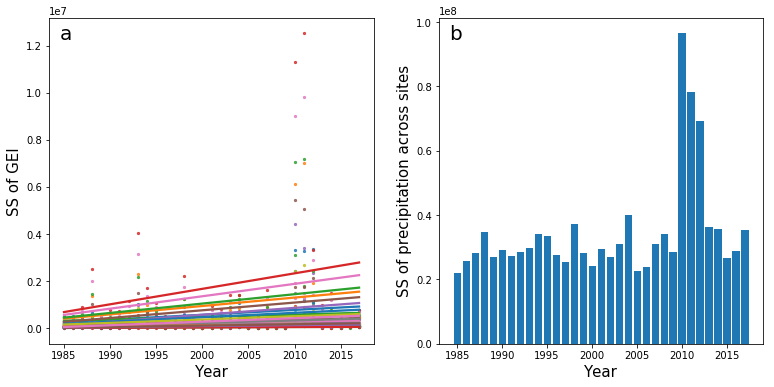

In [42]:
#Plotting #use mean rather than median. 
nursery_reorder=['IDYN','HTWYT','SAWYT','ESWYT']
colors=['blue','red','#9b59b6','green']
markers=['.','+','x','*']
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(12.8,6))
out=pd.read_csv(base_dir+"6_Figures/NCC_R1_Fig2-Fig4/0.1_prediction_gxe_crossover_vegrefgif_clean_absolute_withCheck.csv")
for n in [0]:
    df0=out[out['nursery']==nursery[n]]
    #df0=df.groupby('cultivar')['gxe'].mean().reset_index()
    for l in df0['cultivar'].unique():
        df=df0[df0['cultivar']==l]
        x=df['year']
        gxe=df['gxe']
        sns.regplot(x,gxe,scatter=True,marker=markers[n],scatter_kws={"s": 20},ci=0,ax=ax[0],truncate=True)
ax[0].set_xlabel('Year',fontsize=15)
ax[0].set_ylabel('SS of GEI',fontsize=15)
               
wea=pd.DataFrame(columns=['year','pre_ss'])
for yr in range(1985,2018):
    df=pd.read_csv(base_dir+'6_Figures/NCC_R1_Fig2-Fig4/Climate/cli4all_clean_'+nursery[0]+'_sea_'+str(yr)+'.csv')
    df=df[['pre']]
    value=[]
    for i in range(1):
        #value=value+[df.iloc[:,i].mean()]
        value=value+[np.nansum((df.iloc[:,i]-df.iloc[:,i].mean())**2)]
    wea.loc[len(wea)]=[yr]+value
ax[1].bar(x=wea['year'],height=wea['pre_ss'])

ax[1].set_xlabel('Year',fontsize=15)
ax[1].set_ylabel('SS of precipitation across sites', fontsize=15)

for col in range(2):
    ax[col].text(ax[col].get_xlim()[0]+(ax[col].get_xlim()[1]-ax[col].get_xlim()[0])/30,
           ax[col].get_ylim()[1]-(ax[col].get_ylim()[1]-ax[col].get_ylim()[0])/15,chr(97+col),fontsize=20)
fig.savefig("S7_extreme values and reasons.png",dpi=300,bbox_inches='tight')

# Figure 8 Extreme values and reestimate the trends

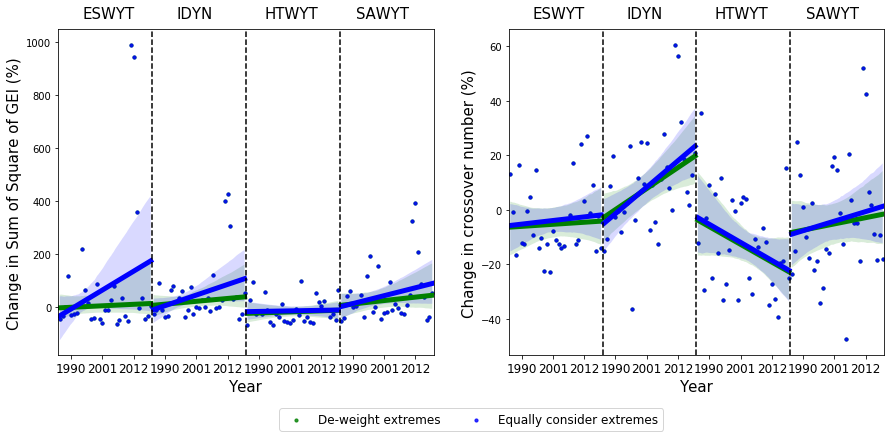

In [43]:
#Combine all plots in one - three stage climate
#colors=['green','blue','red','#9b59b6'] #['ESWYT','IDYN','HTWYT','SAWYT']
colors=['#4203c9', '#16acea', '#d71b6b', '#e8d71e']
colors_start=['#d3ffbe','#bee8ff','#ffbebe','#ffbeff']
colors_end=['#269b00','#004c73','#9b0000','#4c0073']
markers=['.','+','x','*']

fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(14.8,6))
rubt1or0 = True
out0=pd.read_csv(base_dir+"6_Figures/NCC_R1_Fig2-Fig4/0.1_prediction_gxe_crossover_vegrefgif_clean_absolute_withCheck.csv")
for n in range(4):
    out=out0[out0['nursery']==nursery[n]]
    #Climate Change
    x=np.asarray(list(range(1,34)))+n*33
    df=out.groupby('year')['gxe','cross-over'].mean().reset_index()
    gxe=np.asarray(100*(df['gxe']-df['gxe'][:5].mean())/df['gxe'][:5].mean())
    cross=np.asarray(100*(df['cross-over']-df['cross-over'][:5].mean())/df['cross-over'][:5].mean())
    sns.regplot(x,gxe,scatter=True,ax=ax[0],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color='green',truncate=True,robust=True)
    #ax[0,1].scatter(x,cross,s=50,c=colors[n],marker=markers[n])
    #GxE
    if n==0:
        sns.regplot(x,cross,scatter=True,ax=ax[1],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color='green',truncate=True,robust=True,label='De-weight extremes')
    else:
        sns.regplot(x,cross,scatter=True,ax=ax[1],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color='green',truncate=True,robust=True)

    sns.regplot(x,gxe,scatter=True,ax=ax[0],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color='blue',truncate=True,robust=False)
    #ax[0,1].scatter(x,cross,s=50,c=colors[n],marker=markers[n])
    #Cross-over
    
    if n==0:
        sns.regplot(x,cross,scatter=True,ax=ax[1],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color='blue',truncate=True,robust=False,label='Equally consider extremes')
    else:
        sns.regplot(x,cross,scatter=True,ax=ax[1],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color='blue',truncate=True,robust=False)
   
    
for col in range(2):
    ax[col].set_xlim([0.5,132.5])
    ax[col].axvline(33.5,color='black',ls='--')
    ax[col].axvline(66.5,color='black',ls='--')
    ax[col].axvline(99.5,color='black',ls='--')
    ax[col].set_xticks([])
    #ax[col,0].set_ylim([-100,100])

    #Xlim labels
    labels=[5,16,27,38,49,60,71,82,93,104,115,126]
    labels_year=[1990,2001,2012,1990,2001,2012,1990,2001,2012,1990,2001,2012]
    ax[col].set_xticks(labels)
    ax[col].set_xticklabels(labels_year,fontsize=12) #,rotation=270, ha='right')
#fig.savefig("0.1_GxEcrossPredition_ThreestageClimate_robust.png",dpi=300,bbox_inches='tight')#
    ax[col].text(9,ax[col].get_ylim()[1]+(ax[col].get_ylim()[1]-ax[col].get_ylim()[0])/30,nursery[0],fontsize=15)
    ax[col].text(9+33,ax[col].get_ylim()[1]+(ax[col].get_ylim()[1]-ax[col].get_ylim()[0])/30,nursery[1],fontsize=15)
    ax[col].text(9+32*2,ax[col].get_ylim()[1]+(ax[col].get_ylim()[1]-ax[col].get_ylim()[0])/30,nursery[2],fontsize=15)
    ax[col].text(9+32*3,ax[col].get_ylim()[1]+(ax[col].get_ylim()[1]-ax[col].get_ylim()[0])/30,nursery[3],fontsize=15)
    ax[col].set_xlabel("Year",fontsize=15)
ax[0].set_ylabel("Change in Sum of Square of GEI (%)",fontsize=15)
ax[1].set_ylabel("Change in crossover number (%)",fontsize=15)

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles,labels,loc='lower center',
               bbox_to_anchor=(-0.1,-0.25),fontsize=12,ncol=2)
fig.savefig("S8_differenceBetweenConsiderAndNoConsideringExtreme.png",dpi=300,bbox_inches='tight')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5,0,'Cultivar change (line age)')

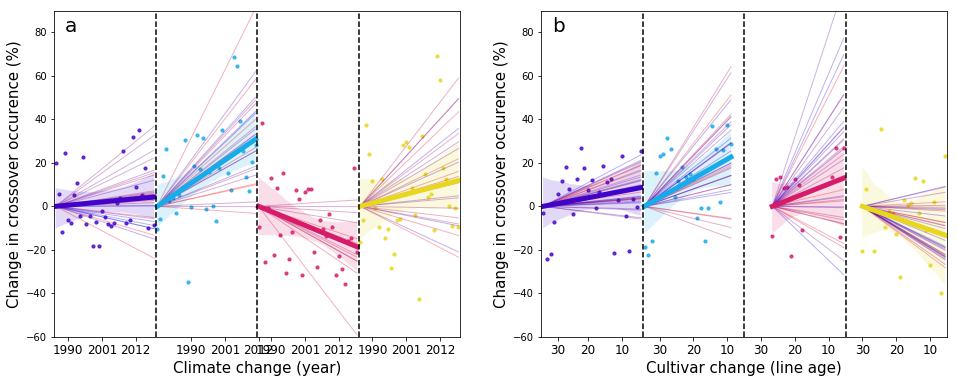

In [51]:
#Plotting
#Color gradients
def hex_to_RGB(hex):
  ''' "#FFFFFF" -> [255,255,255] '''
  # Pass 16 to the integer function for change of base
  return [int(hex[i:i+2], 16) for i in range(1,6,2)]
def RGB_to_hex(RGB):
  ''' [255,255,255] -> "#FFFFFF" '''
  # Components need to be integers for hex to make sense
  RGB = [int(x) for x in RGB]
  return "#"+"".join(["0{0:x}".format(v) if v < 16 else
            "{0:x}".format(v) for v in RGB])
def color_dict(gradient):
  ''' Takes in a list of RGB sub-lists and returns dictionary of
    colors in RGB and hex form for use in a graphing function
    defined later on '''
  return {"hex":[RGB_to_hex(RGB) for RGB in gradient],
      "r":[RGB[0] for RGB in gradient],
      "g":[RGB[1] for RGB in gradient],
      "b":[RGB[2] for RGB in gradient]}

def linear_gradient(start_hex, finish_hex="#FFFFFF", n=10):
  ''' returns a gradient list of (n) colors between
    two hex colors. start_hex and finish_hex
    should be the full six-digit color string,
    inlcuding the number sign ("#FFFFFF") '''
  # Starting and ending colors in RGB form
  s = hex_to_RGB(start_hex)
  f = hex_to_RGB(finish_hex)
  # Initilize a list of the output colors with the starting color
  RGB_list = [s]
  # Calcuate a color at each evenly spaced value of t from 1 to n
  for t in range(1, n):
    # Interpolate RGB vector for color at the current value of t
    curr_vector = [
      int(s[j] + (float(t)/(n-1))*(f[j]-s[j]))
      for j in range(3)
    ]
    # Add it to our list of output colors
    RGB_list.append(curr_vector)
  return color_dict(RGB_list)

def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = [lower_quartile - IQR, upper_quartile + IQR]
    return quartileSet
#Plotting
#Color gradients
fittype=['absolute','relative']
colors=['#4203c9', '#16acea', '#d71b6b', '#e8d71e']
colors_start=['#d3ffbe','#bee8ff','#ffbebe','#ffbeff']
colors_end=['#269b00','#004c73','#9b0000','#4c0073']
markers=['.','+','x','*']
x_cross=[10,38,65,92]
rubt1or0 = False

fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
out=pd.read_csv("E:/Dropbox (RSG)/Works/CurrentProcessing/Wheat_Phenotypic/1.0_Cross_Over/6_Figures/NCC_R1_Fig2-Fig4/0.1_prediction_gxe_crossover_vegrefgif_clean_absolute_noCheck.csv")
#df0=pd.read_csv(data_out+"NoEj_0.1_prediction_gxe_crossover_clean_METE.csv")
#out=pd.read_csv(data_out+"NoEj_0.1_prediction_gxe_crossover_clean_METE.csv")
change=[]

for n in range(4):
    df0=out[out['nursery']==nursery[n]]
    df0['cross']=100*df0['cross-over']/(df0['nline']*(df0['nline']-1)/2)
##############################Climate change#########################################################
    #x=np.asarray(list(range(1,40)))+n*39
    x=np.asarray(list(range(1,34)))+n*33
    #X=np.asarray(x).reshape(-1,1)
    #x=np.asarray(range(1985,2018))
    #"#ffff00","#0000ff" #grey "#F3F0F0","#000000" #Red blue "#FF0000","#0000FF"
    color_ramp=linear_gradient("#FF0000","#0000FF",len(out['cultivar'].unique()))['hex']
    w=0
    for l in df0['cultivar'].unique():
        df=df0[df0['cultivar']==l][['year','cross']]
        X_opt=np.asarray(x)
        X_opt=sm.add_constant(X_opt)
        y=np.asarray(df['cross'])
        OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
        bs=OLS.params[0]+OLS.params[1]*x.min()
        cross=100*(df['cross']-bs)/bs
        sns.regplot(x.astype('float'),cross,scatter=True,ci=0,scatter_kws={'s':0},
                    line_kws={'lw':1,'alpha': 0.3,'color':color_ramp[l-1]},ax=ax[0],truncate=True,robust=rubt1or0)
    df=df0[['year','cross']].apply(pd.to_numeric)
    df=df.groupby('year')['cross'].mean().reset_index()
    X_opt=np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=np.asarray(df['cross'])
    OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
    bs=OLS.params[0]+OLS.params[1]*x.min()
    cross=100*(df['cross']-bs)/bs
    #ax[0].scatter(x,cross,c=colors[n],alpha=0.3,s=28)
    sns.regplot(x.astype('float'),cross,scatter=True,ax=ax[0],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color=colors[n],truncate=True,robust=rubt1or0)
    change=change+[OLS.params[1]*33*100/bs]
    #change_=round(xx.get_lines()[n].get_ydata()[len(xx.get_lines()[n].get_ydata())-1]-xx.get_lines()[n].get_ydata()[n],0)
    #ax[0,1].text(x_gxe[n],-66,str(change_)+'%',fontsize=12)
#################################################Breeding progress###################################################
    if n==0 or n==3:x=np.asarray(df0['cultivar'].unique()+(27-len(df0['cultivar'].unique())))+n*27 #ESWYT
    if n==1: x=np.asarray(df0['cultivar'].unique())+n*27
    #if n==2: x=np.asarray([8,9,10,11,12,13,14,15,16,24,25,26,27,28])+n*32
    if n==2: x=np.asarray([8,9,10,11,12,13,14,15,16,24,25,26,27])+n*27

    #X=np.asarray(x).reshape(-1,1)
    #x=np.asarray(out['cultivar'].unique()+(27-len(out['cultivar'].unique())))
    color_ramp=linear_gradient("#FF0000","#0000FF",len(out['year'].unique()))['hex']
    w=0
    for l in df0['year'].unique():
        df=df0[df0['year']==l][['cultivar','cross']]
        X_opt=np.asarray(x)
        X_opt=sm.add_constant(X_opt)
        y=np.asarray(df['cross'])
        OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
        bs=OLS.params[0]+OLS.params[1]*x.min()
        cross=100*(df['cross']-bs)/bs
        sns.regplot(x.astype('float'),cross,scatter=True,ci=0,scatter_kws={'s':0},
                    line_kws={'lw':1,'alpha': 0.3,'color':color_ramp[l-1985]},ax=ax[1],truncate=True,robust=rubt1or0)
#        w=w+1
    df=df0[['cultivar','cross']].apply(pd.to_numeric)
    df=df.groupby('cultivar')['cross'].mean().reset_index()   
    X_opt=np.asarray(x)
    X_opt=sm.add_constant(X_opt)
    y=np.asarray(df['cross'])
    OLS = sm.OLS(endog = y.astype(np.float64), exog = X_opt.astype(np.float64)).fit()
    bs=OLS.params[0]+OLS.params[1]*x.min()
    cross=100*(df['cross']-bs)/bs
    #ax[1].scatter(x,cross,c=colors[n],alpha=0.3,s=28)
    sns.regplot(x.astype('float'),cross,scatter=True,ax=ax[1],scatter_kws={"s": 10},
                line_kws={'lw':5},marker='o',color=colors[n],truncate=True,robust=rubt1or0)
    change=change+[OLS.params[1]*(x.max()-x.min()+1)*100/bs]
#Text and labels
#for col in range(2):
ax[0].set_xlim([0.5,132.5])
#ax[0].set_xlim([0.5,156.5])
ax[0].axvline(33.5,color='black',ls='--')
ax[0].axvline(66.5,color='black',ls='--')
ax[0].axvline(99.5,color='black',ls='--')
#ax[0].set_xticks([])

ax[1].set_xlim([0.5,108.5])
ax[1].axvline(27.5,color='black',ls='--')
ax[1].axvline(54.5,color='black',ls='--')
ax[1].axvline(81.5,color='black',ls='--')
#ax[1].set_xticks([])

#Xlim labels
labels=[5,16,27,38,49,60,71,82,93,104,115,126]
labels_year=[1990,2001,2012,1990,2001,2012,1990,2001,2012,1990,2001,2012]
ax[0].set_xticks(labels)
ax[0].set_xticklabels(labels_year,fontsize=12) #,rotation=270, ha='right')

labels=[5,13,22,32,41,50,59,68,77,86,95,104]
#labels_line=[5,13,22,5,13,22,5,13,22,5,13,22]
labels_line=[30,20,10,30,20,10,30,20,10,30,20,10]
ax[1].set_xticks(labels)
ax[1].set_xticklabels(labels_line,fontsize=12)

ax[0].set_ylim([-60,90])
ax[0].text(ax[0].get_xlim()[0]+(ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/40,
           ax[0].get_ylim()[1]-(ax[0].get_ylim()[1]-ax[0].get_ylim()[0])/15,'a',fontsize=20)

#ax[0,0].text(1,-65,'$\it{Total Change =}$')
#ax[0,0].text(13,-90,'23%',fontsize=12) #GEI ESWYT
#ax[0,0].text(45,-90,'39%$\mathregular{^{*}}$',fontsize=12) #GEI ESWYT
#ax[0,0].text(78,-90,'14%',fontsize=12) #GEI ESWYT
#ax[0,0].text(112,-90,'36%',fontsize=12) #GEI ESWYT

#ax[0].set_ylim([-10,10])
#ax[0].text(ax[0].get_xlim()[0]+(ax[0].get_xlim()[1]-ax[0].get_xlim()[0])/40,
#           ax[0].get_ylim()[1]-(ax[0].get_ylim()[1]-ax[0].get_ylim()[0])/15,'a',fontsize=20)
#ax[0,1].text(13,-66,'3%',fontsize=12) #GEI CROSS
#ax[0,1].text(45,-66,'25%$\mathregular{^{***}}$',fontsize=12) #GEI CROSS
#ax[0,1].text(77,-66,'-18%$\mathregular{^{*}}$',fontsize=12) #GEI CROSS
#ax[0,1].text(113,-66,'7%',fontsize=12) #GEI CROSS

#ax[1,0].set_ylim([-100,220])
#ax[1,0].text(ax[1,0].get_xlim()[0]+(ax[1,0].get_xlim()[1]-ax[1,0].get_xlim()[0])/37,
#           ax[1,0].get_ylim()[1]-(ax[1,0].get_ylim()[1]-ax[1,0].get_ylim()[0])/15,'c',fontsize=20)
#ax[1,0].text(10,-90,'-50%',fontsize=12) #GEI ESWYT
#ax[1,0].text(38,-90,'207%',fontsize=12) #GEI ESWYT
#ax[1,0].text(65,-90,'-98%$\mathregular{^{**}}$',fontsize=12) #GEI ESWYT
#ax[1,0].text(92,-90,'-63%',fontsize=12)

ax[1].set_ylim([-60,90])
ax[1].text(ax[1].get_xlim()[0]+(ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/37,
          ax[1].get_ylim()[1]-(ax[1].get_ylim()[1]-ax[1].get_ylim()[0])/15,'b',fontsize=20)
#ax[1].text(10,-66,'9%',fontsize=12) #CROSS ESWYT
#ax[1].text(37,-66,'22%$\mathregular{^{*}}$',fontsize=12) #CROSS ESWYT
#ax[1].text(65,-66,'14%',fontsize=12) #CROSS ESWYT
#ax[1].text(92,-66,'0%',fontsize=12) #CROSS ESWYT
ax[0].set_ylabel("Change in crossover occurence (%)",fontsize=15)
ax[1].set_ylabel("Change in crossover occurence (%)",fontsize=15)
ax[0].set_xlabel("Climate change (year)",fontsize=15)
ax[1].set_xlabel("Cultivar change (line age)",fontsize=15)
#for n in range(2): 
#    ax[0,n].text(9,ax[0,n].get_ylim()[1]+(ax[0,n].get_ylim()[1]-ax[0,n].get_ylim()[0])/30,nursery[0],fontsize=15)
#    ax[0,n].text(9+33,ax[0,n].get_ylim()[1]+(ax[0,n].get_ylim()[1]-ax[0,n].get_ylim()[0])/30,nursery[1],fontsize=15)
#    ax[0,n].text(9+32*2,ax[0,n].get_ylim()[1]+(ax[0,n].get_ylim()[1]-ax[0,n].get_ylim()[0])/30,nursery[2],fontsize=15)
#    ax[0,n].text(9+32*3,ax[0,n].get_ylim()[1]+(ax[0,n].get_ylim()[1]-ax[0,n].get_ylim()[0])/30,nursery[3],fontsize=15)
#    ax[n,0].set_ylabel("Change in Sum of Square of GEI (%)",fontsize=15)
#    ax[n,1].set_ylabel("Change in crossover number (%)",fontsize=15)
#    ax[0,n].set_xlabel("Climate change (year)",fontsize=15)
#    ax[1,n].set_xlabel("Cultivar change (line age)",fontsize=15)
